In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
x

array([[-0.76176064, -1.38380673],
       [-1.05545759,  1.82115297],
       [ 0.79291203, -2.57443987],
       ...,
       [-0.94942896,  0.47739342],
       [-0.93380801, -1.5458098 ],
       [-0.88032264,  0.48063793]], shape=(1000, 2))

In [5]:
y

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [6]:
pd.DataFrame(x)[0]

0     -0.761761
1     -1.055458
2      0.792912
3     -1.073634
4     -1.115389
         ...   
995   -0.666904
996    0.706281
997   -0.949429
998   -0.933808
999   -0.880323
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

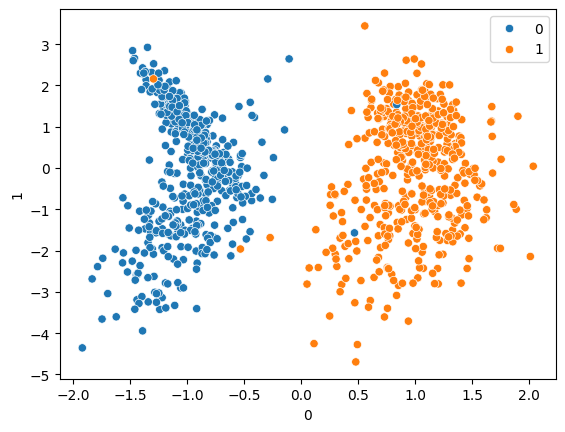

In [7]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC(kernel='linear')

In [11]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [12]:
y_pred = svc.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       133\n           1       1.00      1.00      1.00       117\n\n    accuracy                           1.00       250\n   macro avg       1.00      1.00      1.00       250\nweighted avg       1.00      1.00      1.00       250\n'

In [15]:
confusion_matrix(y_test,y_pred)

array([[133,   0],
       [  0, 117]])

# Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [18]:
grid = GridSearchCV(SVC(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.987 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.993 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.993 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.993 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.993 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.987 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.987 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.993 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.993 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.993 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.987 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'gamma': 1}

In [21]:
y_pred1 = grid.predict(x_test)

In [22]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       133\n           1       0.99      0.99      0.99       117\n\n    accuracy                           0.99       250\n   macro avg       0.99      0.99      0.99       250\nweighted avg       0.99      0.99      0.99       250\n'

In [23]:
confusion_matrix(y_test,y_pred1)

array([[132,   1],
       [  1, 116]])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred1)

0.992